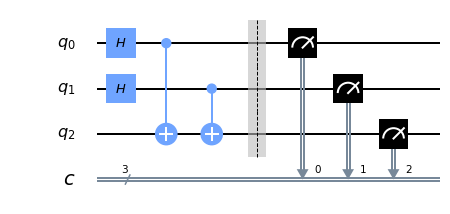

In [24]:
import numpy as np
from qiskit import *
%matplotlib inline

#creation of the 3 qubits circuit and settings of the gates and operations
circ = QuantumCircuit(3)
circ.h(0)
circ.h(1)
circ.cx(0,2)
circ.cx(1,2)

#measuring of the qubits and drawing of the final quantum circuit (qc)
meas = QuantumCircuit(3,3)
#measure on the 3 qubits
meas.barrier(range(3))
meas.measure(range(3),range(3))
qc=circ+meas
qc.draw()

In [25]:
#choice of the simulator we want to use to run the circuit
backend_sim = Aer.get_backend('qasm_simulator')
#shots=number of iterations on the simulation
job_sim = execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
#show the number of times we measured each possible final quantum state
print(counts)

{'101': 245, '011': 245, '110': 266, '000': 268}


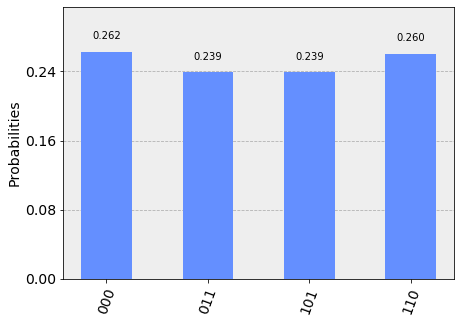

In [26]:
from qiskit.visualization import plot_histogram
#show the result as an histogram
plot_histogram(counts)

In [27]:
from qiskit import IBMQ
#give your account number in order to unlock your credits
IBMQ.save_account('3bcfad36f8593a1b6b5458ac347117dc9f68e2eb288448475fbad6d167b0992907538347735be3be718d964dace7003c499b4789b5a9ebcc50f2c9034cb43d44')
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [28]:
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [29]:
#show the different physical machines we can use and their backends
provider = IBMQ.get_provider(group='open')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [30]:
#choice of the backend we will use during the measurement
backend = provider.get_backend('ibmq_burlington')

In [31]:
from qiskit.tools.monitor import job_monitor

In [32]:
#execute the programm on the chosen backend
job_exp = execute(qc, backend=backend)
job_monitor(job_exp)

Job Status: job has successfully run


In [33]:
result_exp = job_exp.result()

In [34]:
counts_exp = result_exp.get_counts(qc)
print(counts_exp)

{'011': 162, '100': 46, '000': 302, '001': 66, '110': 168, '101': 151, '010': 45, '111': 84}


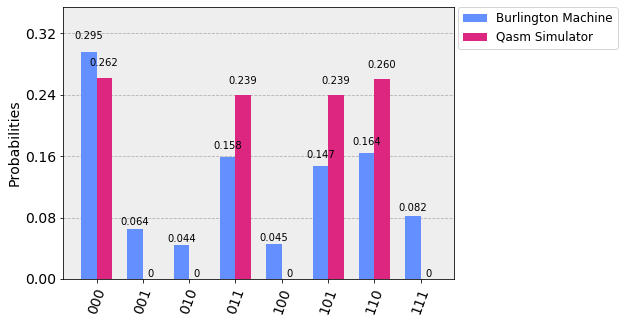

In [35]:
from qiskit.visualization import plot_histogram
#show on the same histogram the results obtained using the real machine and the simulator
plot_histogram([counts_exp,counts], legend=['Burlington Machine', 'Qasm Simulator'])